In [1]:
#Реализация задачи регрессии
#Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image 
from IPython.core.display import HTML 
%matplotlib inline
import pydot

In [3]:
#скачиваем файл
data = pd.read_csv('bill_authentication.csv')

In [4]:
data.shape

(1372, 5)

In [5]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
#Разделим данные на признаки
X = data.drop('Class', axis=1)
y = data['Class']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [9]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear').fit(X_train, y_train)

In [10]:
y_pred = svcclassifier.predict(X_test)
y_pred[:10]

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [11]:
y_test[:10]

964     1
1268    1
667     0
261     0
1344    1
615     0
1192    1
627     0
1203    1
855     1
Name: Class, dtype: int64

In [12]:
#Оценка алгоритма
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[216   1]
 [  1 194]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       0.99      0.99      0.99       195

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [13]:
#Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность
#каждого объекта одному из классов, тогда матрица ошибок классификации будет выглядеть следующим образом
Image(url= "https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816", width=400) 

In [14]:
#Деревья решений
from sklearn.tree import DecisionTreeClassifier
TreeClassifier = DecisionTreeClassifier()
TreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
yTree_pred = TreeClassifier.predict(X_test)
print(yTree_pred[:10])

[1 1 0 0 1 0 1 0 1 1]


In [16]:
print(y_test[:10])

964     1
1268    1
667     0
261     0
1344    1
615     0
1192    1
627     0
1203    1
855     1
Name: Class, dtype: int64


In [17]:
#Так же оцениваем алгорит
print(confusion_matrix(y_test,yTree_pred))
print(classification_report(y_test,yTree_pred))

[[214   3]
 [  6 189]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       217
           1       0.98      0.97      0.98       195

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [18]:
#При использовании Деревьев решений хорошим способом оценить результат является построение 
#визуализированного дерева на основе обучения. 
#Для этого выделим столбцы нашего датасета и построим на их основе Дерево.
X_train.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

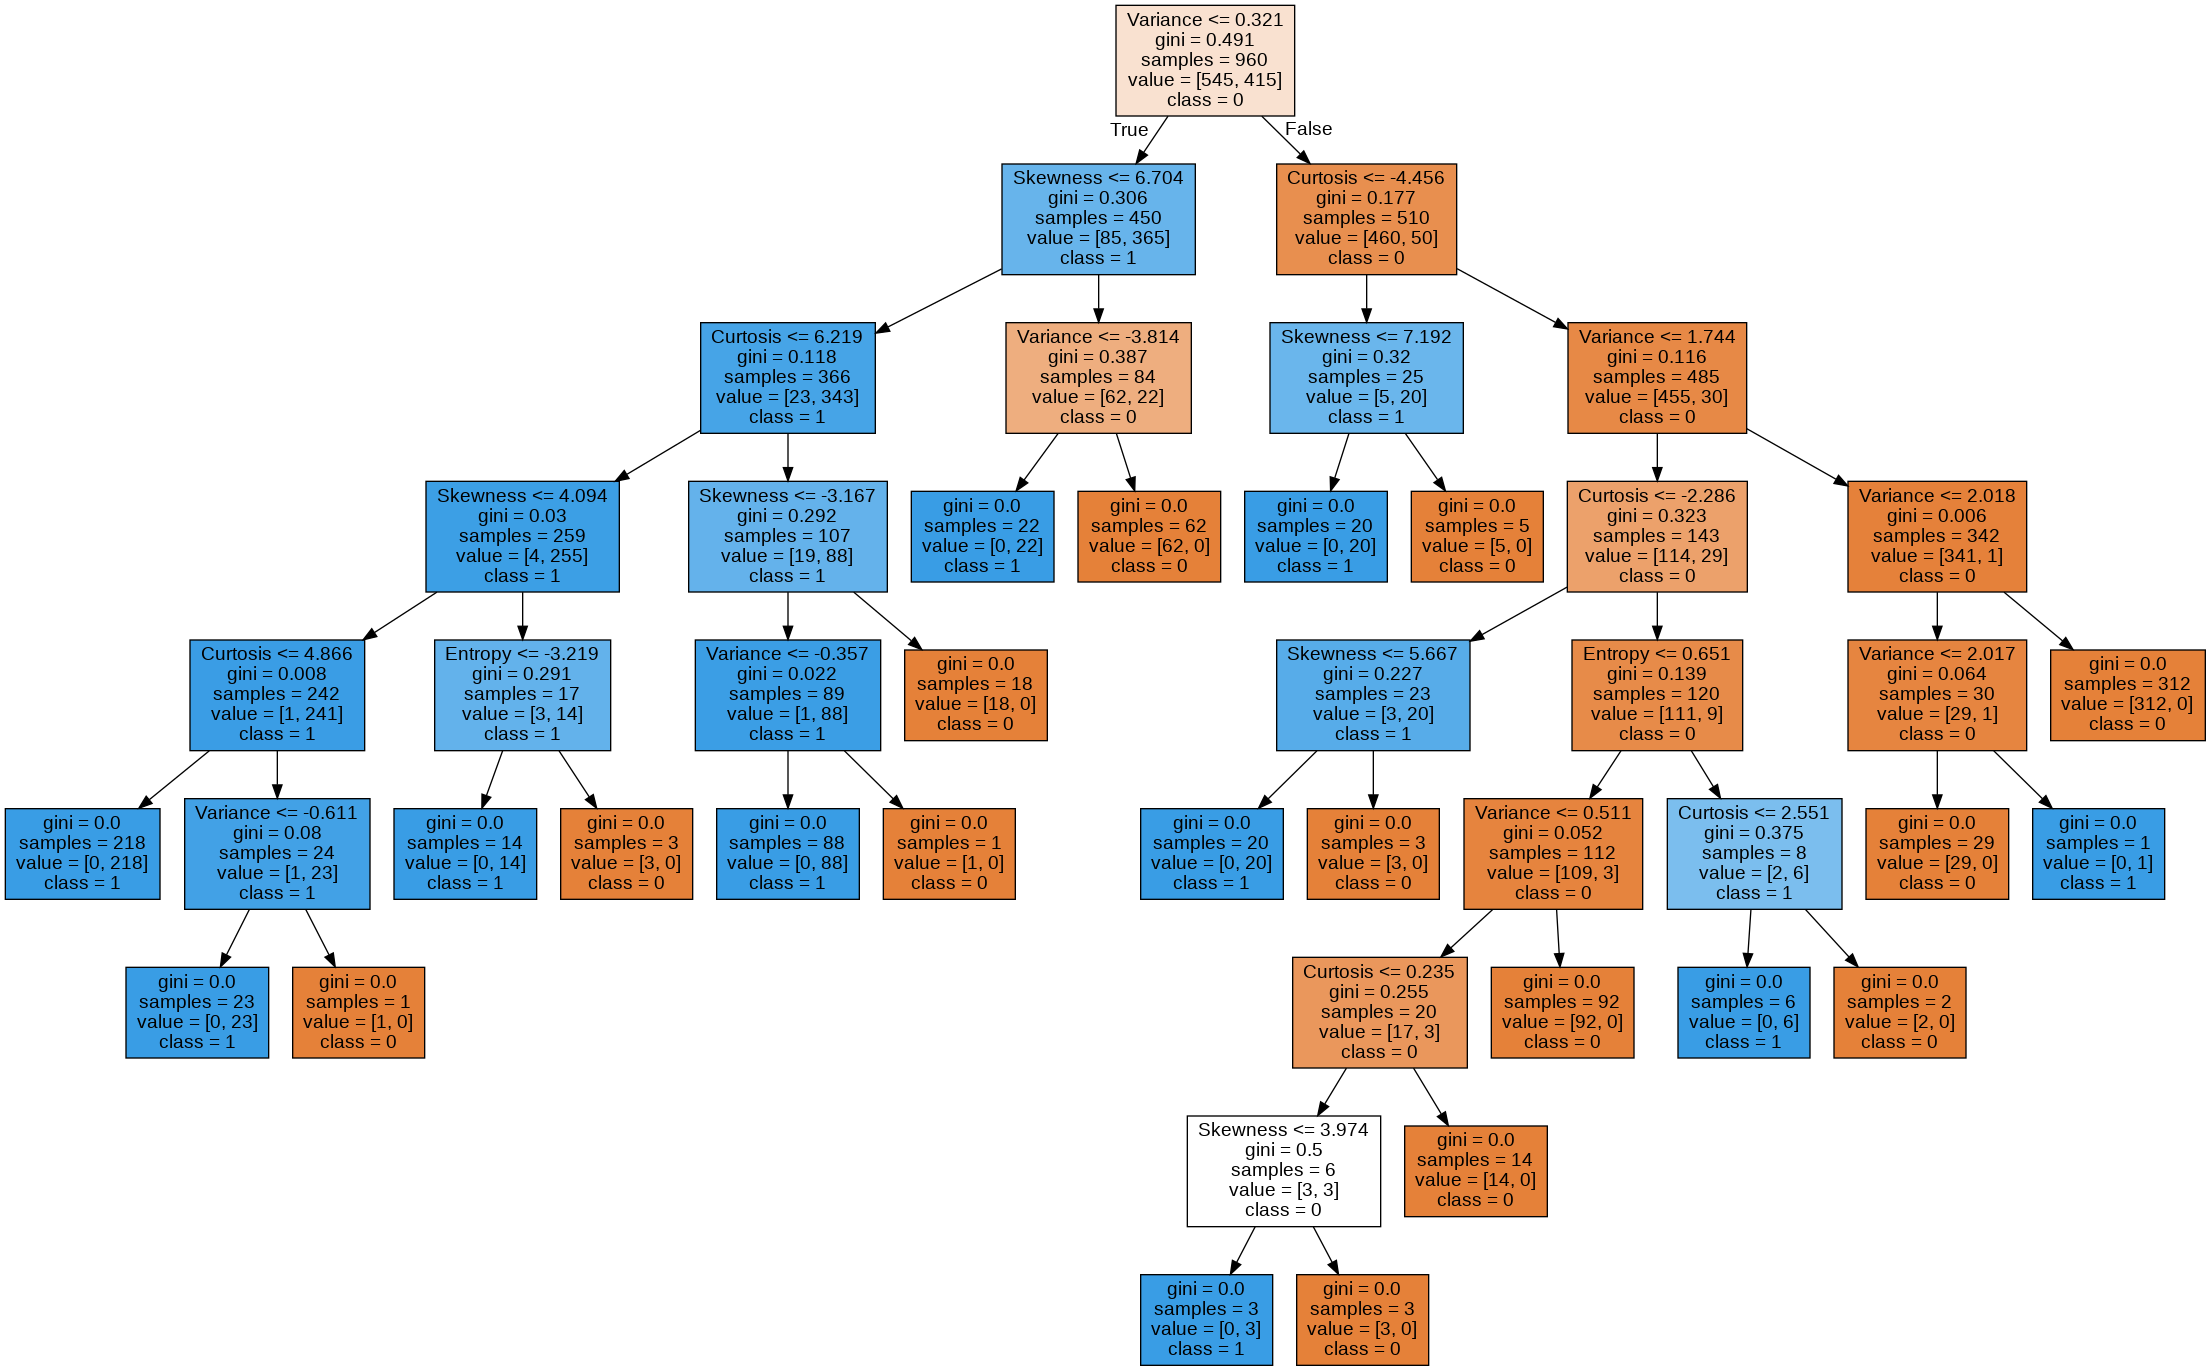

In [28]:
# для визуализации дерева используем .dot формат 
from sklearn.tree import export_graphviz
# в feature_names можно прямо прописать названия признаков, а можно написать X_train.columns
export_graphviz(TreeClassifier, feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'], class_names=['0', '1'], 
out_file='small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png' 
Image("small_tree.png", width=1200)

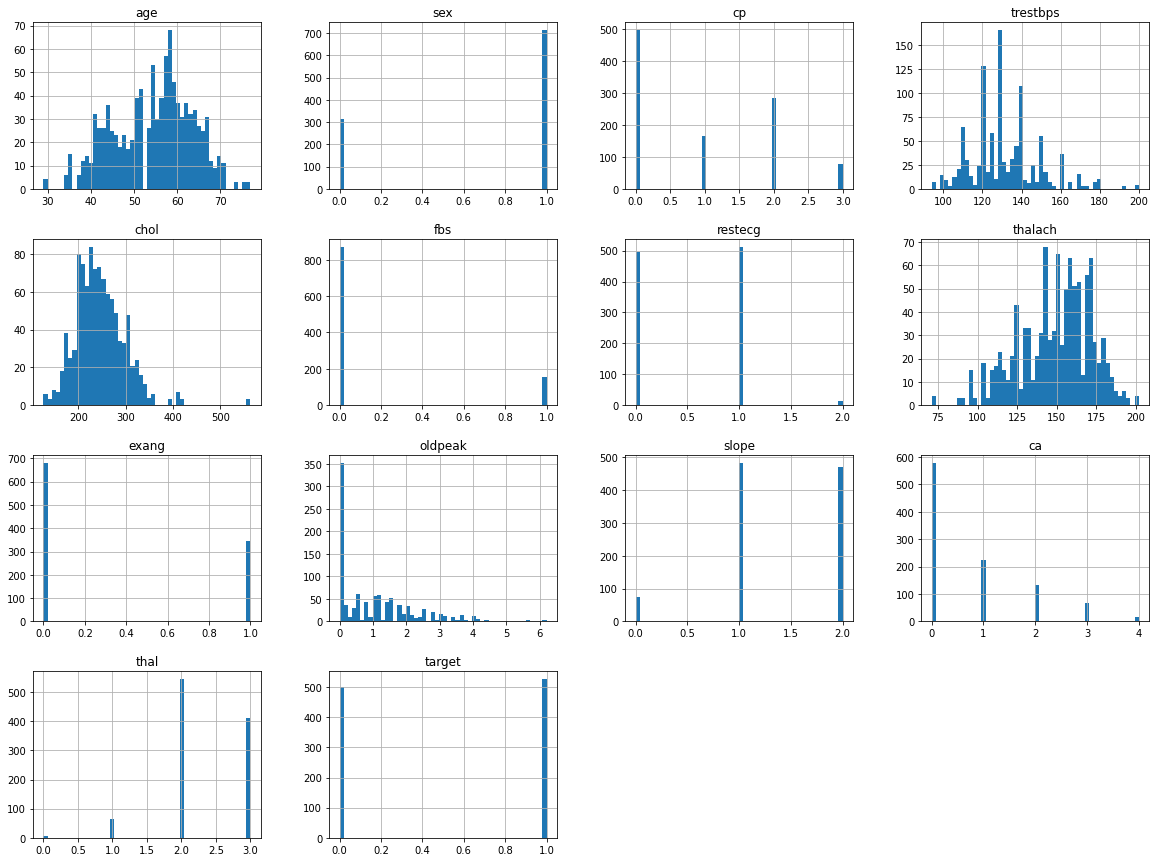

In [21]:
#Задание 

from IPython.display import Image 
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
data = pd.read_csv('heart.csv')
X = data.drop('target', axis = 1)
y = data['target']
data.hist(bins=50, figsize=(20, 15));

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
svcclassifier = SVC(kernel = 'linear').fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[132  24]
 [ 19 133]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       156
           1       0.85      0.88      0.86       152

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



In [23]:
#Дерево решений
TreeClass = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
yTree_pred = TreeClass.predict(X_test)

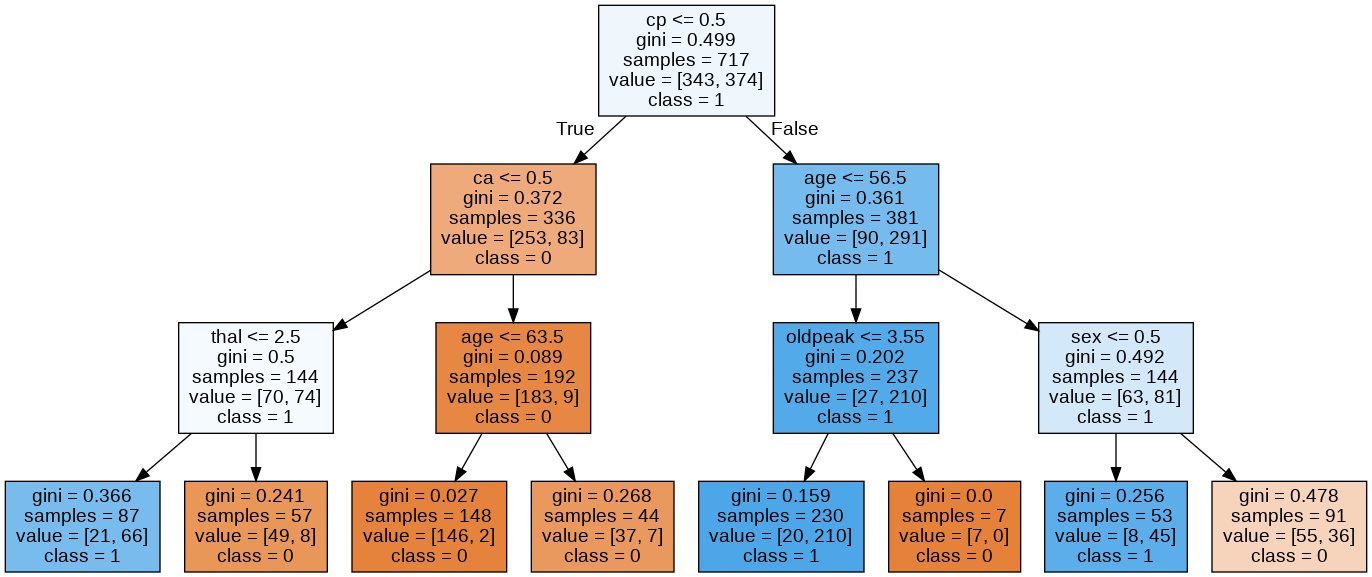

In [26]:
from sklearn.tree import export_graphviz
export_graphviz(TreeClass, feature_names= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'],
                class_names = ['0', '1'], out_file = 'big_tree.dot', filled = True)
!dot -Tpng 'big_tree.dot' -o 'big_tree.png'
Image("big_tree.png", width=1200)


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')